<a href="https://colab.research.google.com/github/rNEGI1729/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import math
import torch
from torch import nn, optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [59]:
# Download data
ticker = "AAPL"     # ticker is like code name for stock
df = yf.download(ticker, start="2000-01-01", end="2020-01-01")
df.index = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
data = df[['Close']]  # We only need the 'Close' price

[*********************100%***********************]  1 of 1 completed


In [60]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2000-01-03,0.843077,0.999442,1.004464,0.907924,0.936384,535796800
2000-01-04,0.771997,0.915179,0.987723,0.903460,0.966518,512377600
2000-01-05,0.783293,0.928571,0.987165,0.919643,0.926339,778321600
2000-01-06,0.715508,0.848214,0.955357,0.848214,0.947545,767972800
2000-01-07,0.749401,0.888393,0.901786,0.852679,0.861607,460734400


In [61]:
data.head()

Price,Close
Ticker,AAPL
Date,
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
2000-01-07,0.888393


In [62]:
data.shape

(5031, 1)

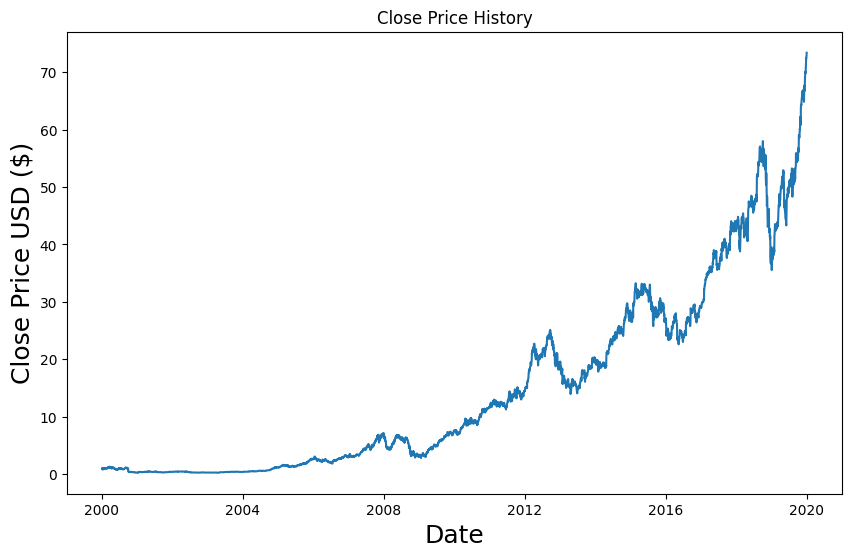

In [63]:
plt.figure(figsize=(10,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [64]:
# convert dataframe into numpy arrays

dataset = data.values
len(dataset)

5031

In [65]:
# get data for training
data_train_len = math.ceil(len(dataset)*0.8)

In [66]:
data_train_len

4025

In [67]:
# Scale data

scaler  = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [68]:
len(scaled_data)

5031

In [69]:
scaled_data

array([[0.01045606],
       [0.00930459],
       [0.00948759],
       ...,
       [0.98684716],
       [0.99272323],
       [1.        ]])

In [70]:
# extract data for training

train_data = scaled_data[0:data_train_len, :]

# define no. of words for training(pattern recognition)
sequence_length = 100

# split train_data into X_train and y_train
X_train = []
y_train = []

for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [71]:
X_train.shape

(3925, 100)

In [72]:
y_train.shape

(3925,)

In [73]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [74]:
X_train.shape

(3925, 100, 1)

In [75]:
# Build LSTM model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
# train the model

model.fit(X_train,y_train,batch_size = 1 ,epochs=5)

Epoch 1/5
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - loss: 3.8041e-04
Epoch 2/5
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - loss: 1.1601e-04
Epoch 3/5
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 6.5555e-05
Epoch 4/5
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 4.2110e-05
Epoch 5/5
3925/3925 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 4.1306e-05


In [79]:
# test data

test_data = scaled_data[data_train_len-sequence_length:, :]

# create X_test , y_test data

X_test = []
y_test = dataset[data_train_len:,:]

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])



In [80]:
X_test = np.array(X_test)

In [81]:
X_test[0]

array([0.38451627, 0.39049483, 0.39018737, 0.39295458, 0.39705418,
       0.39479939, 0.38970909, 0.38164658, 0.35810815, 0.34908908,
       0.35120718, 0.37153428, 0.38256897, 0.38383302, 0.38202238,
       0.36480413, 0.3805875 , 0.37385738, 0.37009941, 0.38048502,
       0.37310578, 0.38137327, 0.38697602, 0.39073397, 0.3940478 ,
       0.39449194, 0.38598529, 0.38437962, 0.39039234, 0.38420882,
       0.38735182, 0.38967492, 0.38868418, 0.38092915, 0.36938199,
       0.37361824, 0.37115848, 0.37389152, 0.37525806, 0.3770687 ,
       0.37525806, 0.37088517, 0.37983593, 0.37805943, 0.37870854,
       0.37331076, 0.37894768, 0.37614631, 0.37850357, 0.38547284,
       0.38543869, 0.39138308, 0.4036135 , 0.39063148, 0.38813759,
       0.40426258, 0.40856715, 0.40504835, 0.41078776, 0.41553644,
       0.41358914, 0.40989951, 0.41037779, 0.40870381, 0.39572179,
       0.39346703, 0.39213467, 0.3805875 , 0.38687354, 0.38519955,
       0.39749829, 0.40258859, 0.40436509, 0.39906979, 0.40293

In [82]:
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [83]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [84]:
predictions[0],y_test[0]

(array([26.263536], dtype=float32), array([26.33749962]))

In [85]:
# get Root mean squared error
rmse= np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.046934752134756

<ipython-input-86-06d8de8a0a7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


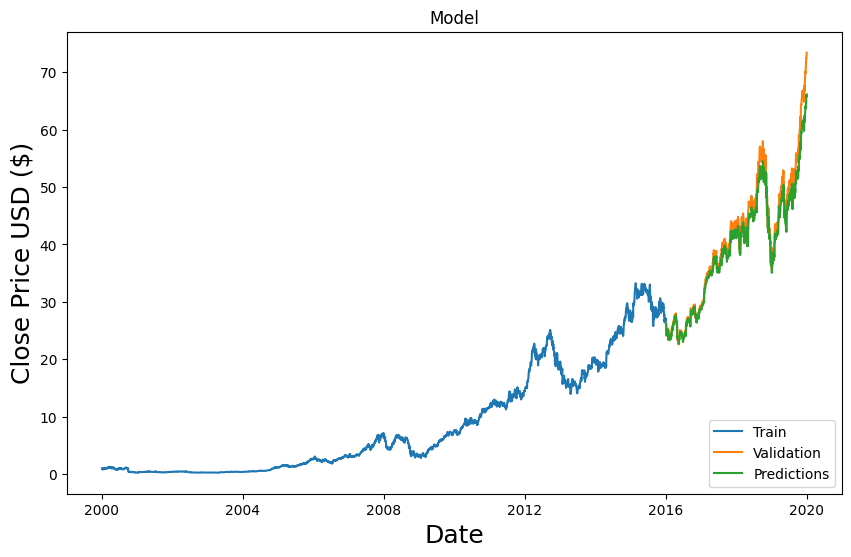

In [86]:
# plot data
train = data[:data_train_len]
valid = data[data_train_len:]
valid['Predictions'] = predictions


plt.figure(figsize=(10,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()


In [87]:
valid


Price,Close,Predictions
Ticker,AAPL,
Date,,
2016-01-04,26.337500,26.263536
2016-01-05,25.677500,26.256962
2016-01-06,25.174999,25.659985
2016-01-07,24.112499,25.217079
2016-01-08,24.240000,24.270720
...,...,...
2019-12-24,71.067497,64.798569
2019-12-26,72.477501,64.681046


In [87]:
model.save("latest_stock_price_model.keras")